## Import 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

plt.rcParams['font.family'] = 'Malgun Gothic'

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [4]:
df = pd.read_csv('../data/train.csv')

#### 가입 이후 경과 일수 (days_since_signup)
- (raw) "가입 날짜 - 현재 날짜" => - (negative)
- (new) raw 값에 절대값을 씌어 + (positive) 값으로 변환하여 보다 직관적으로 표현

In [5]:
df['signup_date_positive'] = abs(df['signup_date'])

## EDA (시각화)
- 가설 (질문 던져보기)

In [6]:
def mk_graph(data, column_name):
    # churned가 1인 데이터만 선택
    data_filtered = data[data['churned'] == 1]

    # 데이터 타입 확인
    col_dtype = data_filtered[column_name].dtypes

    # x 라벨 문자열에서 숫자를 추출하여 정렬
    def extract_number(label):
        numbers = re.findall(r'[\d\.]+', label)
        return [float(num) for num in numbers]

    # 첫 번째 그래프
    fig, axs = plt.subplots(1, 1, figsize=(14, 10))

    # 그래프 g1
    ax1 = axs

    if col_dtype == 'object':
        # unique values from the column
        x_labels = data_filtered[column_name].unique()
        sorted_x_labels = sorted(x_labels, key=extract_number)
        g1 = sns.countplot(data=data_filtered, x=column_name, ax=ax1, order=sorted_x_labels)
    else:
        g1 = sns.countplot(data=data_filtered, x=column_name, ax=ax1)

    total = len(data_filtered)
    for p in g1.patches:
        height = p.get_height()
        g1.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    # 각 x 레이블에 대해 최소값과 최대값 계산
    x_labels = g1.get_xticklabels()
    for label in x_labels:
        x_val = label.get_text()
        
        # x_val의 타입을 column_name의 타입으로 변환
        if col_dtype == 'int64':
            x_val = int(x_val)
        elif col_dtype == 'float64':
            x_val = float(x_val)
        elif col_dtype == 'category':
            x_val = str(x_val)
        elif col_dtype == 'object':
            x_val = str(x_val)

        # column_name으로 그룹화하고 churned 데이터의 합계를 구함
    subset_data = data_filtered.groupby(column_name)['churned'].sum().reset_index()
    if len(subset_data) > 0:
        min_y = subset_data['churned'].min()
        max_y = subset_data['churned'].max()
        if min_y - max_y * 0.4 >  0 :
            ax1.set_ylim(min_y - max_y * 0.4, max_y + max_y * 0.05)
        else :
            ax1.set_ylim(min_y - max_y * 0.1, max_y + max_y * 0.05)

    # 레이아웃 조정 및 출력
    plt.tight_layout()
    plt.show()


def mk_category_column(data,column,N) :
    df_max = data[column].max()
    data.loc[data[column] < df_max * (1/(N)), f'{column}_range'] = f"{round(df_max * (1/(N)),2)}이하"
    for i in range(2,N) :
        data.loc[(data[column] >= df_max * ((i-1)/(N))) & (data[column] <= df_max * (i/(N))), f'{column}_range'] = f"{round(df_max * ((i-1)/(N)),2)}< {column} < {round(df_max * (i/(N)),2)}"
    data.loc[data[column] > df_max *(N-1)/(N), f'{column}_range'] = f"{round(df_max *(N-1)/(N),2)}이상"


def mk_category_column_age(data) :
    data.loc[data['age']<10, 'Age_range'] = '0대'
    data.loc[(data['age']>=10) & (data['age']<20), 'Age_range'] = '10대'
    data.loc[(data['age']>=20) & (data['age']<30), 'Age_range'] = '20대'
    data.loc[(data['age']>=30) & (data['age']<40), 'Age_range'] = '30대'
    data.loc[(data['age']>=40) & (data['age']<50), 'Age_range'] = '40대'
    data.loc[(data['age']>=50) & (data['age']<60), 'Age_range'] = '50대'
    data.loc[(data['age']>=60) & (data['age']<70), 'Age_range'] = '60대'
    data.loc[(data['age']>=70) & (data['age']<80), 'Age_range'] = '70대'
    data.loc[data['age']>=80, 'Age_range'] = '80대'

### Question 1 : 특정 연령대의 고객들이 다른 연령대보다 구독을 취소할 가능성이 더 높을까?
- age, churned 가입 유형과 구독 취소 간의 관계

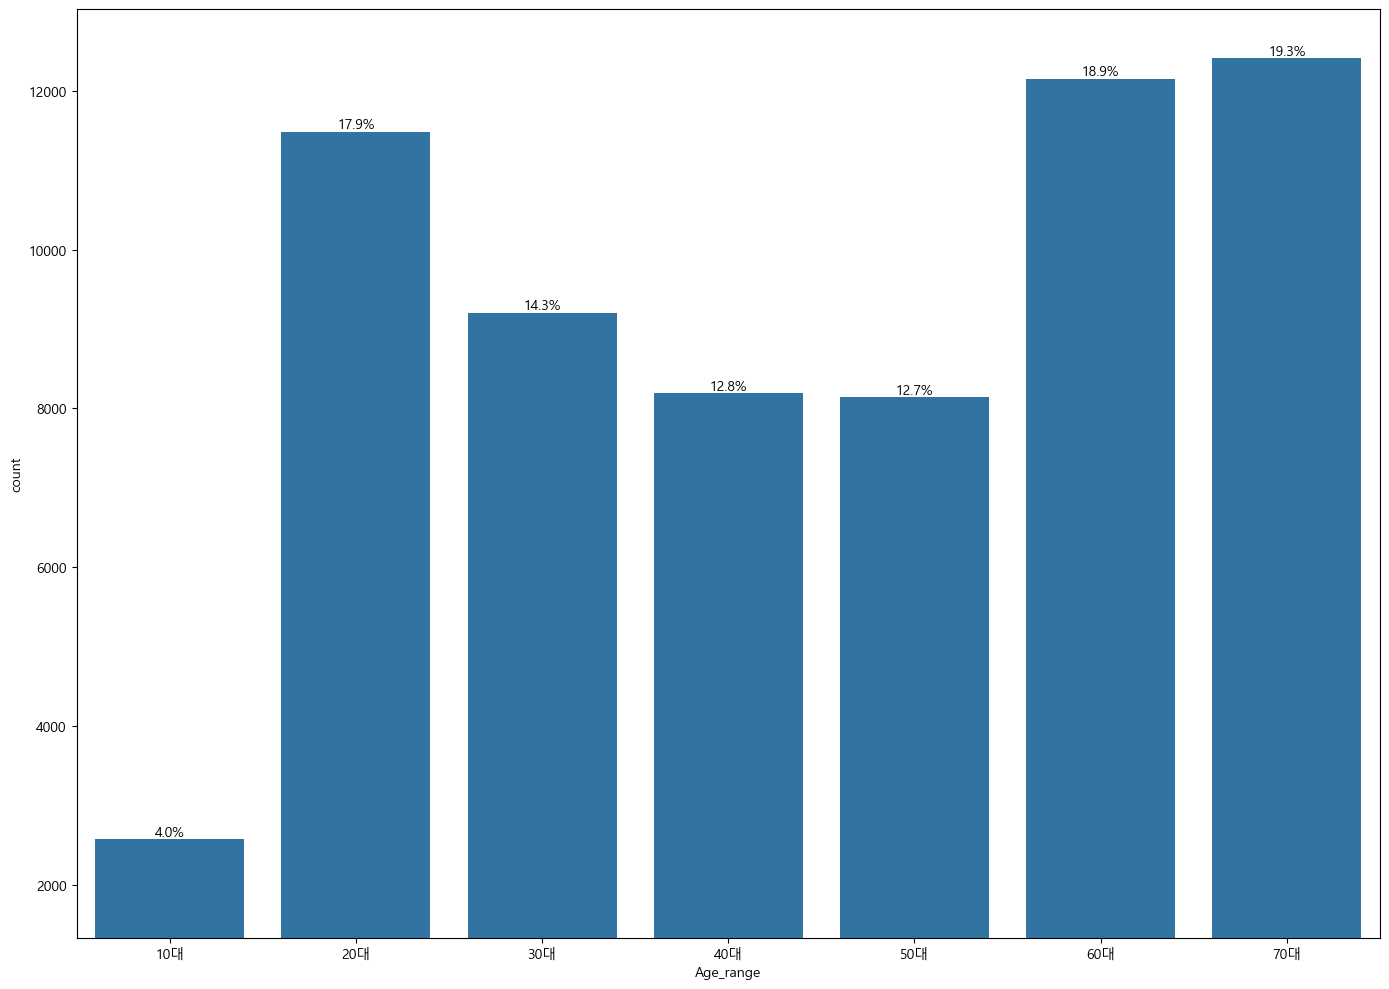

In [7]:
mk_category_column_age(df)
mk_graph(df,"Age_range")

### Question 2 : 무료 구독(Free) 사용자들이 유료 구독(Premium, Family) 사용자들보다 구독을 취소할 가능성이 더 높을까?
- subscription_type, churned 결제 방식과 구독 취소 간의 관계

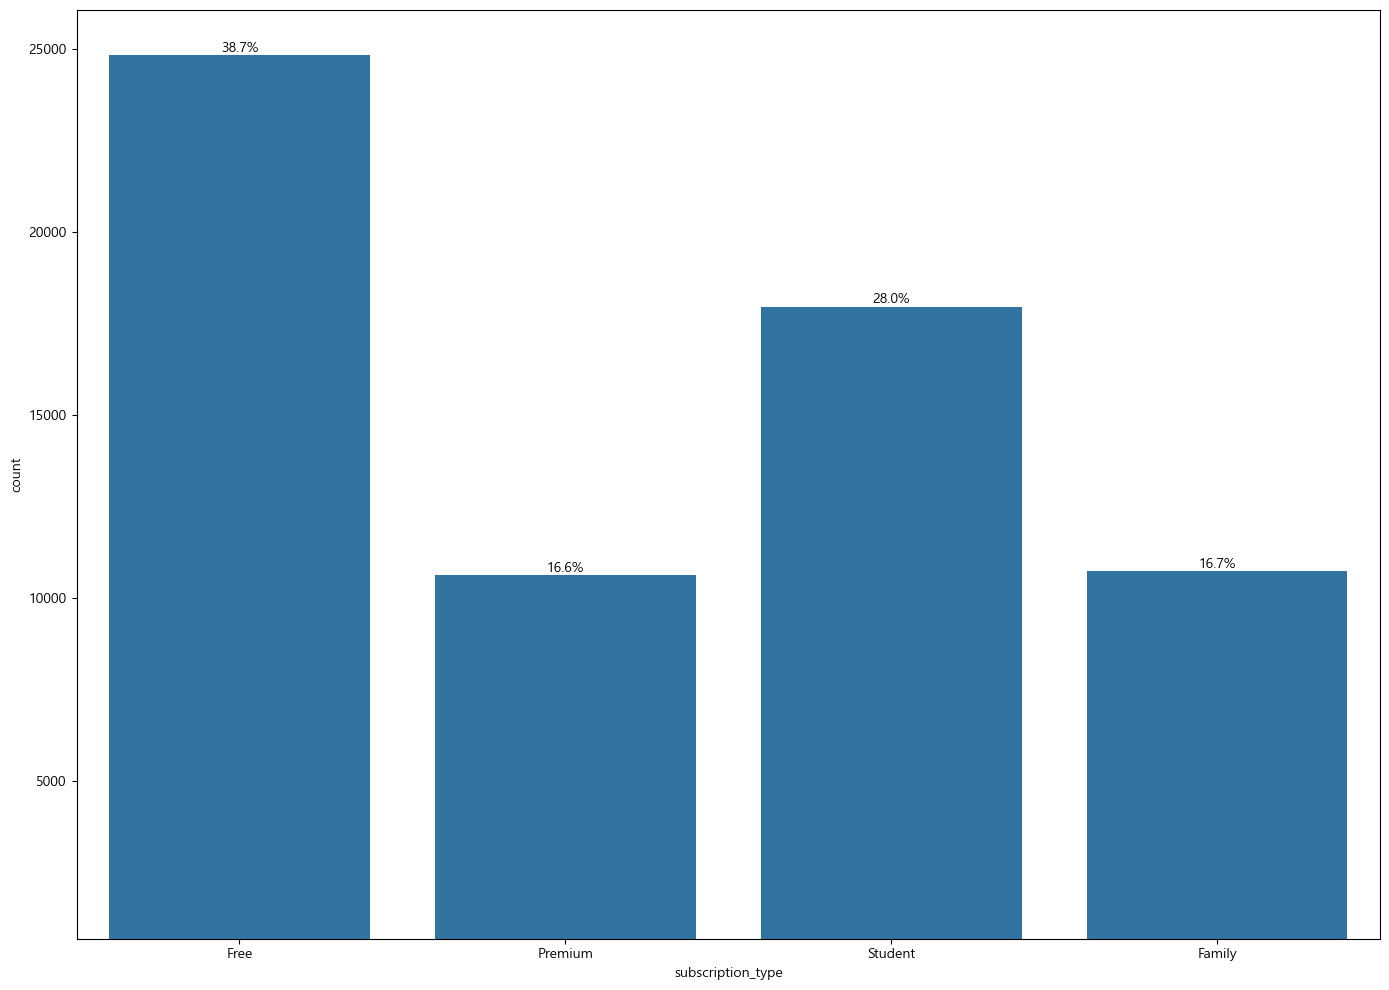

In [8]:
mk_graph(df, 'subscription_type')

### Question 3 : 특정 결제 방식을 사용하는 고객들이 구독을 취소할 가능성이 더 높을까?
- payment_method, churned 고객 서비스 문의 빈도와 구독 취소 간의 관계 

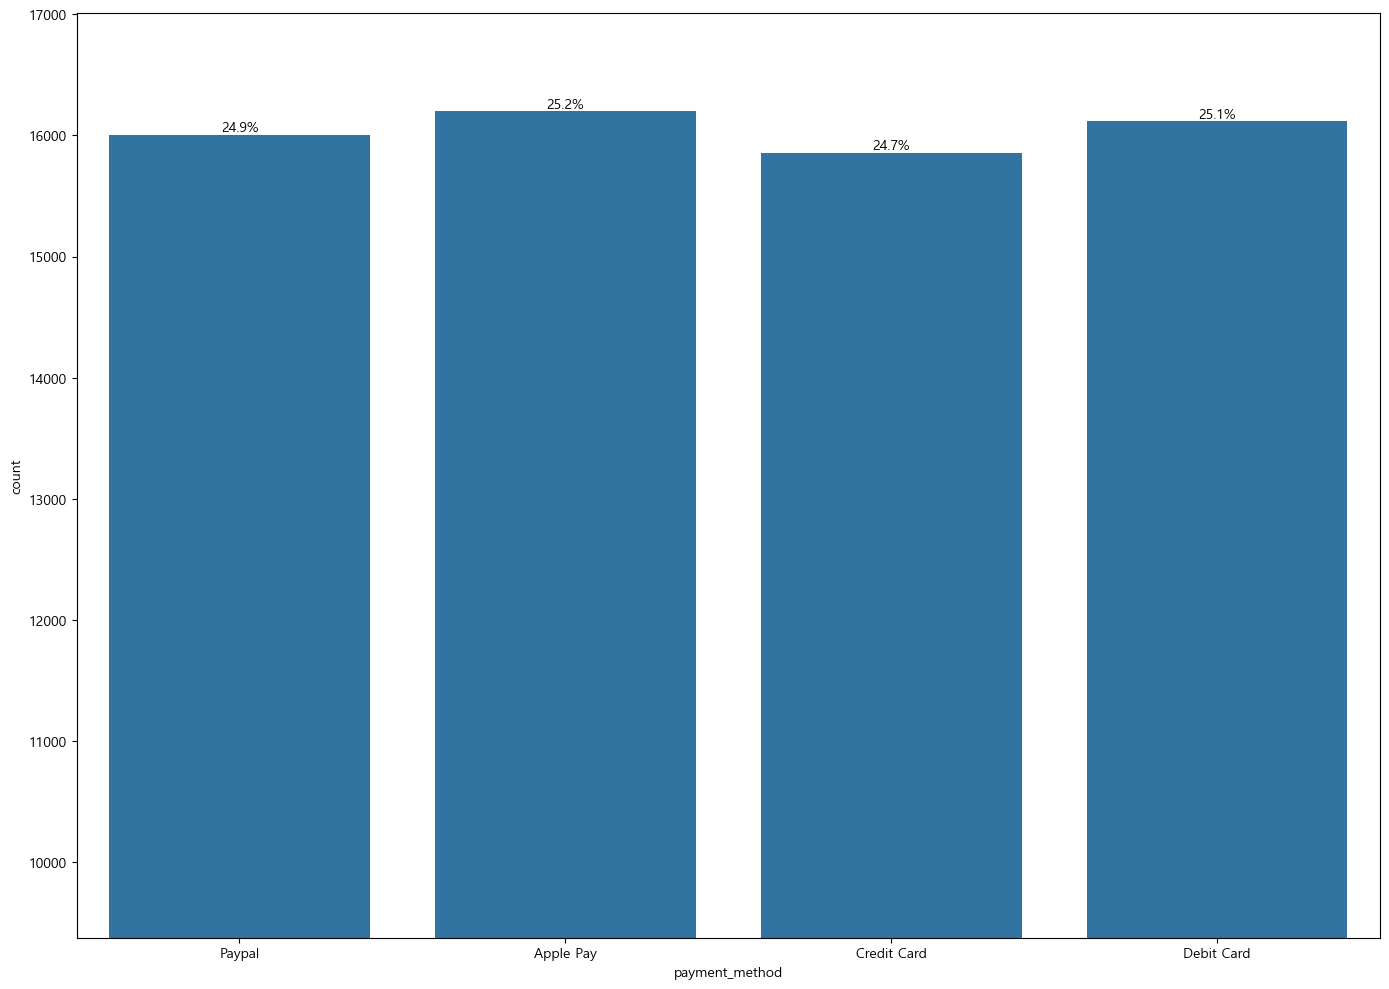

In [9]:
mk_graph(df, 'payment_method')

### Question 4 : 고객 서비스 문의 빈도가 높은 고객들이 구독을 취소할 가능성이 더 높을까?
- customer_service_inquiries, churned 가입 일자와 구독 취소 간의 관계


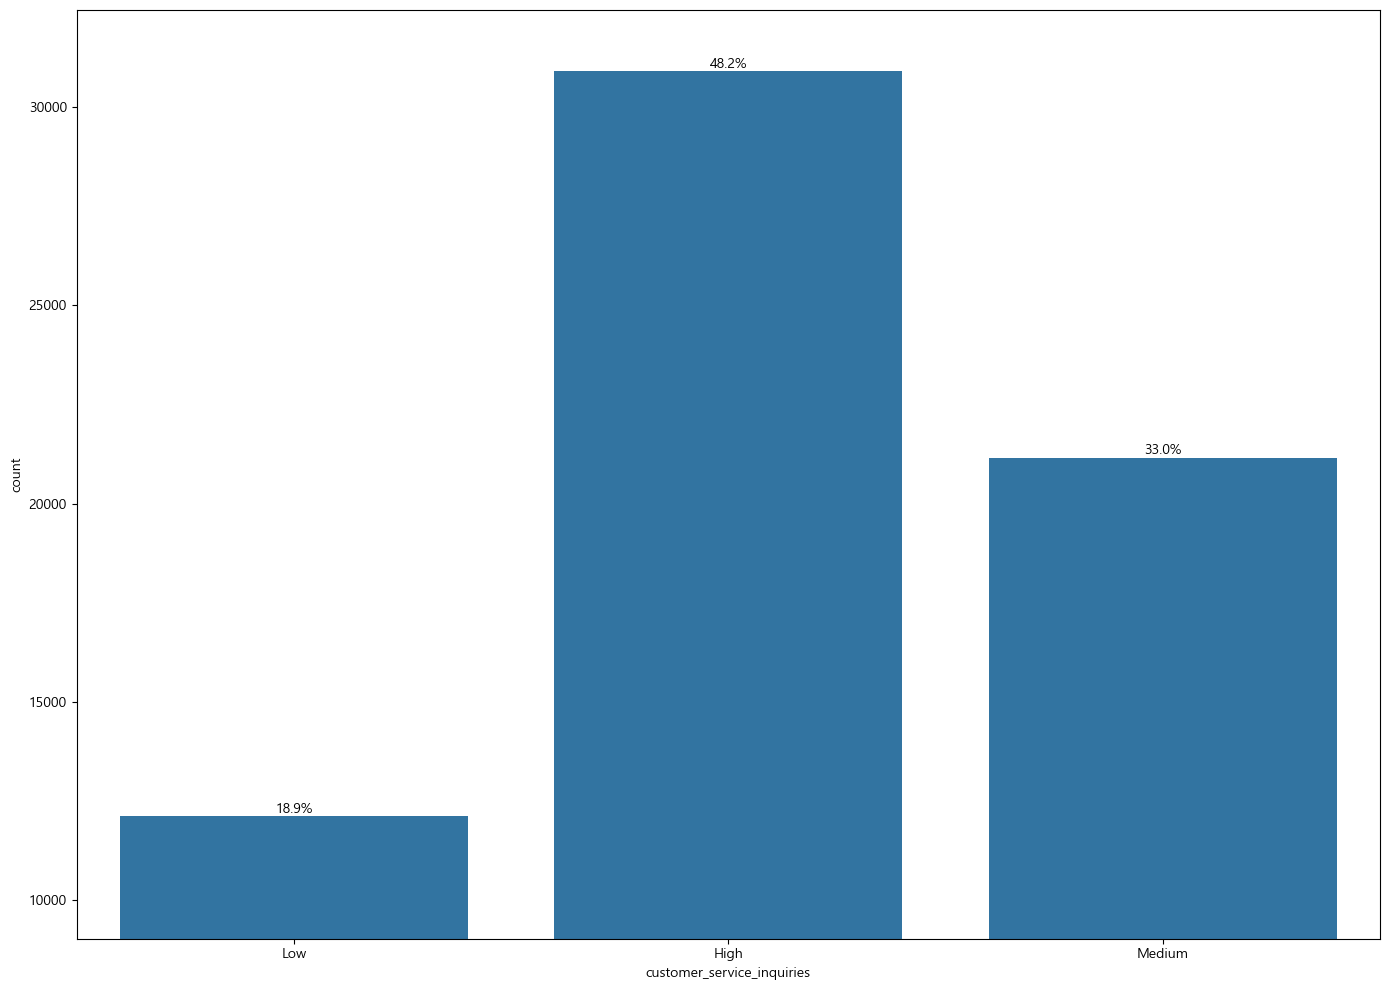

In [10]:
mk_graph(df, 'customer_service_inquiries')

### Question 5 : 오래 가입한 고객들이 구독을 취소할 가능성이 더 낮을까?
- signup_date, churned 주간 활동과 구독 취소 간의 관계

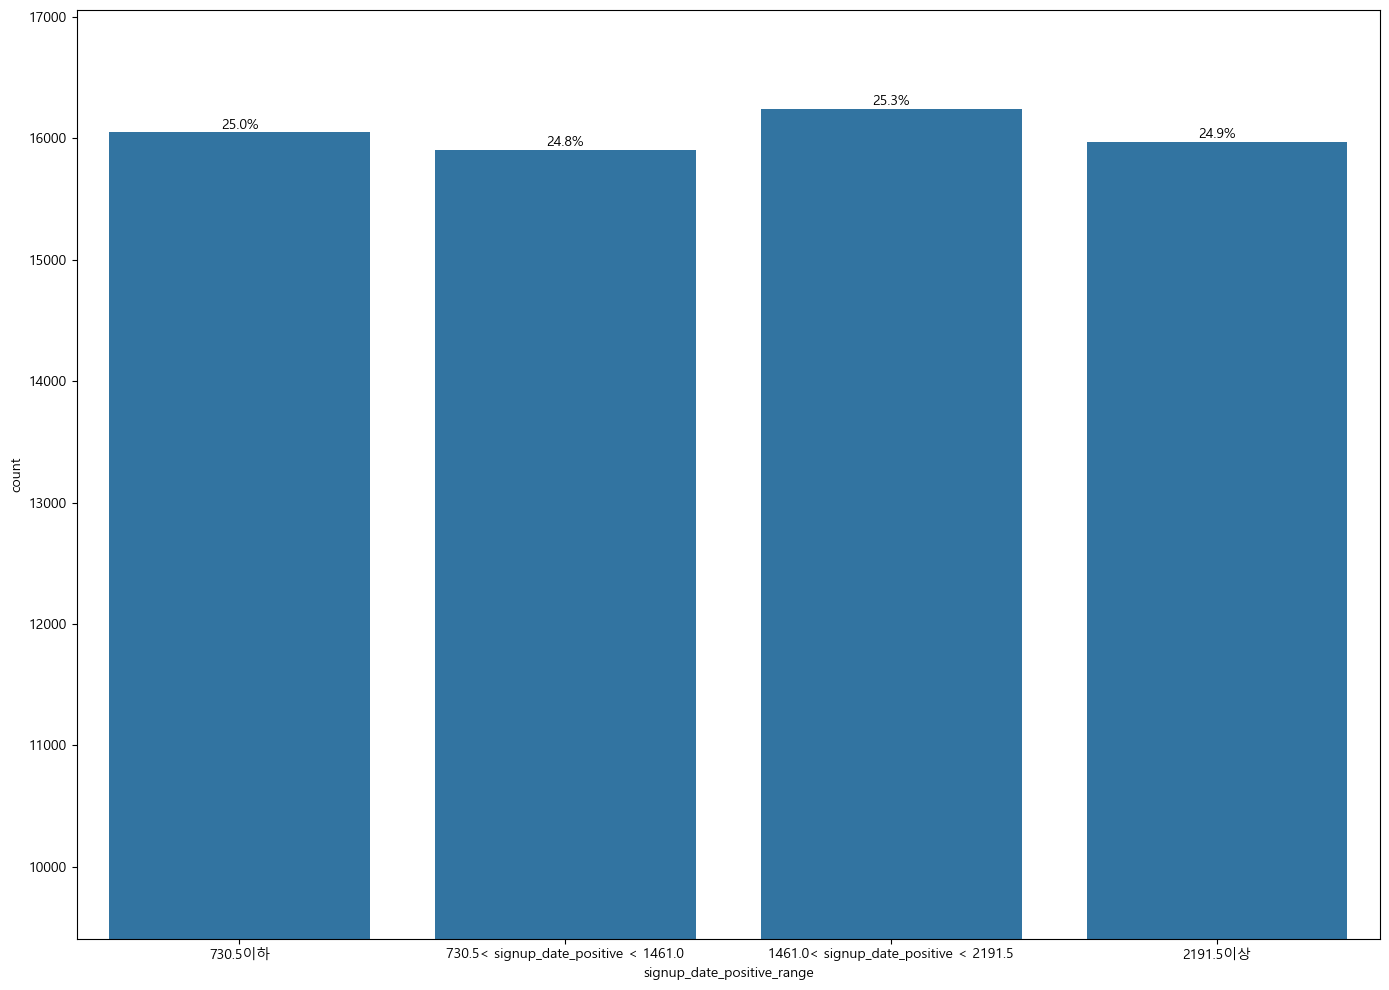

In [11]:
mk_category_column(df, 'signup_date_positive', 4)
mk_graph(df, 'signup_date_positive_range')

### Question 6 : 플랫폼에서 많은 친구를 가진 고객들이 구독을 취소할 가능성이 더 낮을까?
- num_platform_friends, churned 알림 클릭 수와 구독 취소 간의 관계

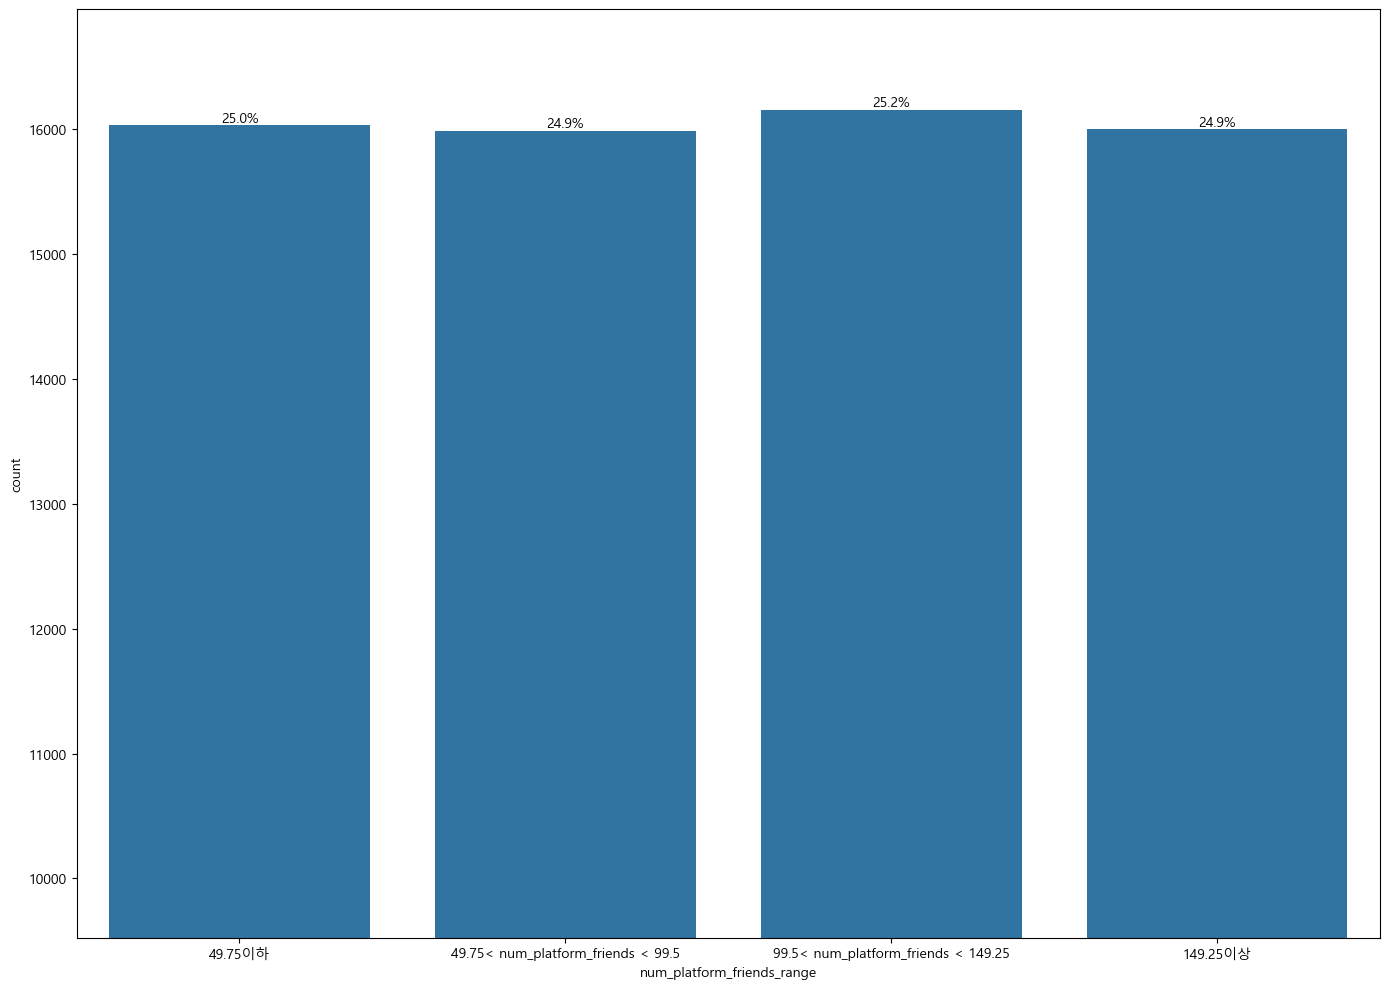

In [12]:
mk_category_column(df, 'num_platform_friends', 4)
mk_graph(df, 'num_platform_friends_range')

### Question 7: num_subscription_pauses, 중간에 구독을 멈춘 횟수가 높을수록 이탈률이 높을까?
- num_subscription_pauses, churned 사용자가 구독을 일시 중지한 횟수와 구독 취소 간의 관계

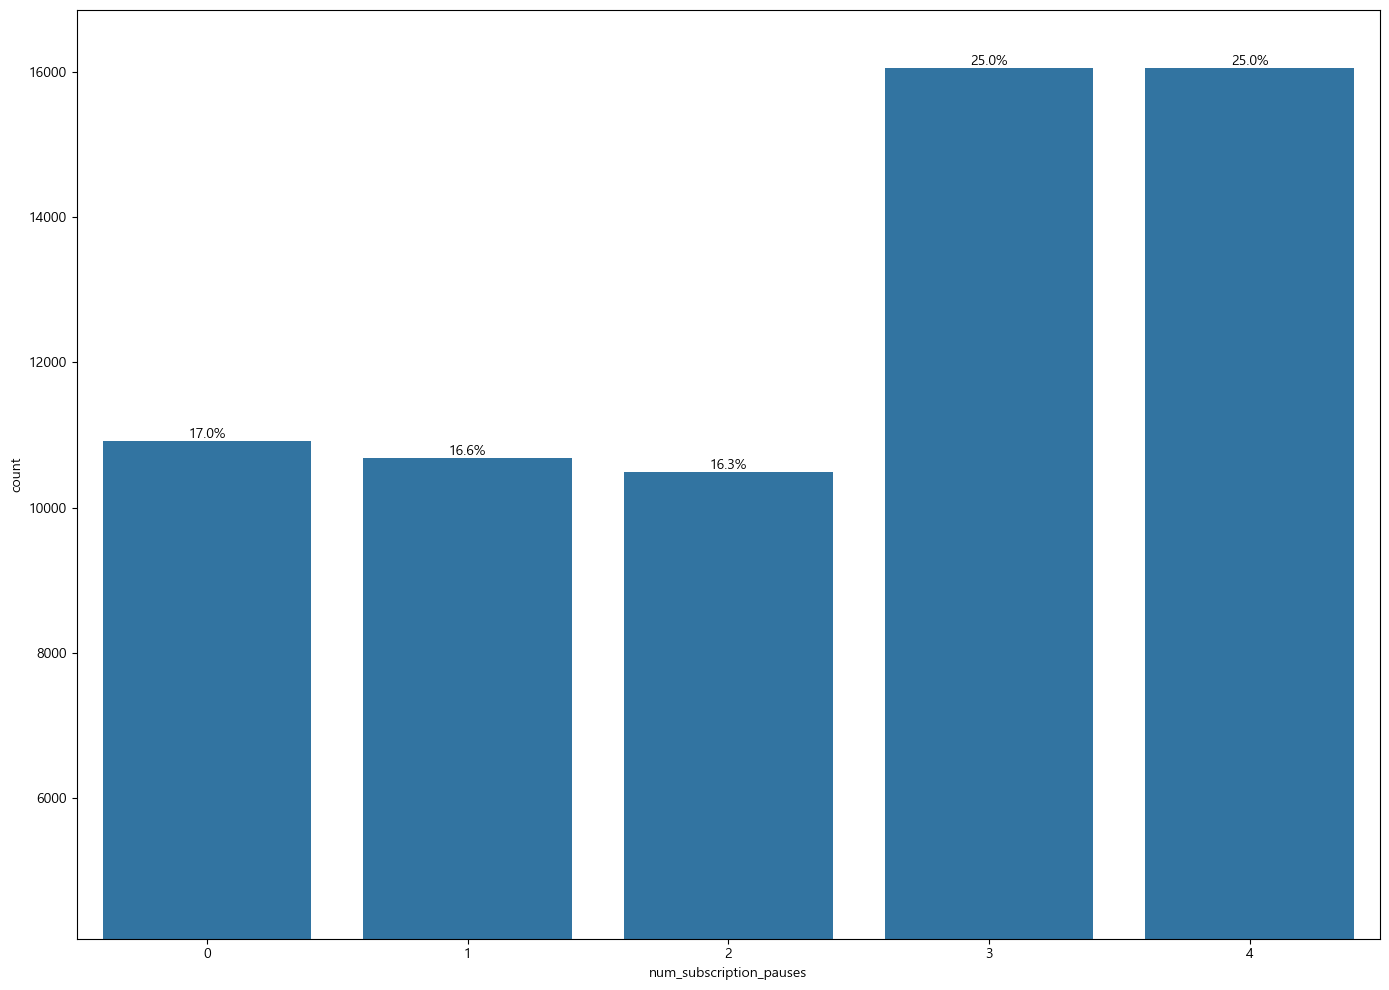

In [13]:
mk_graph(df,'num_subscription_pauses')

### Question 8 : weekly_hours, 주당 서비스 이용시간이 높을수록 이탈률이 낮을까?
- weekly_hours, churned 주간 평균 청취 시간과 구독 취소 간의 관계

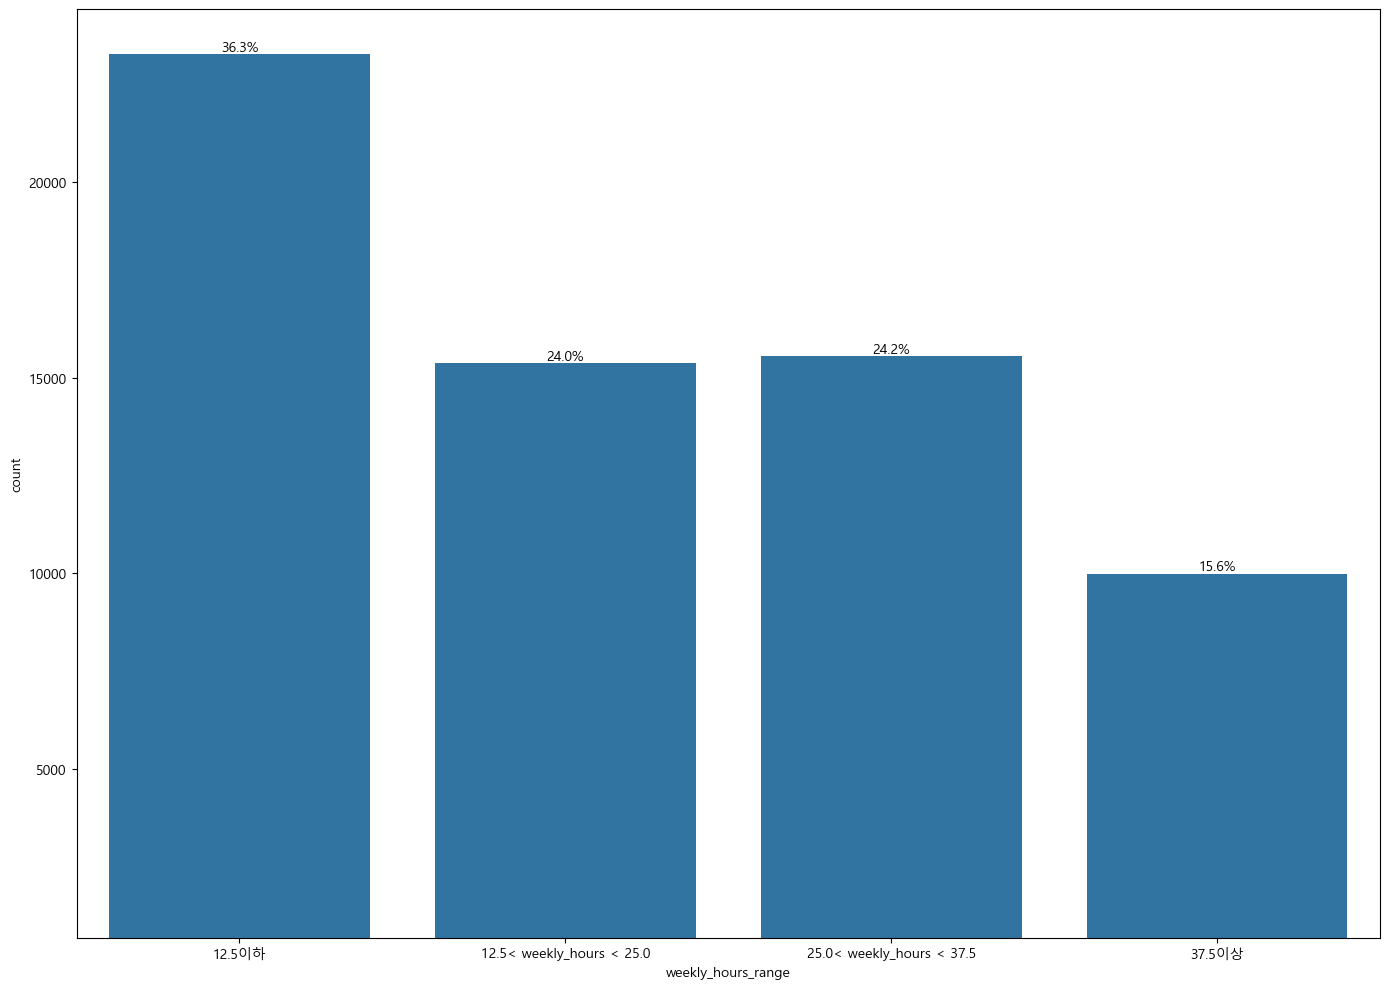

In [14]:
mk_category_column(df,'weekly_hours',4)
mk_graph(df,'weekly_hours_range')

### Question 9 : song_skip_rate, 음악을 듣는 도중 끈 비율이 높을수록 이탈률이 높을까?
- 이탈률과 크게 관련성은 없어 보이지만, 히트맵을 이용해서 가시적인 시각으로 보았을 때 상관계수가 상대적으로 높은 feature이기에 확인이 필요해 보인다.
- song_skip_rate, churned 주사용자가 끝내지 못한 노래의 비율과 구독 취소 간의 관계

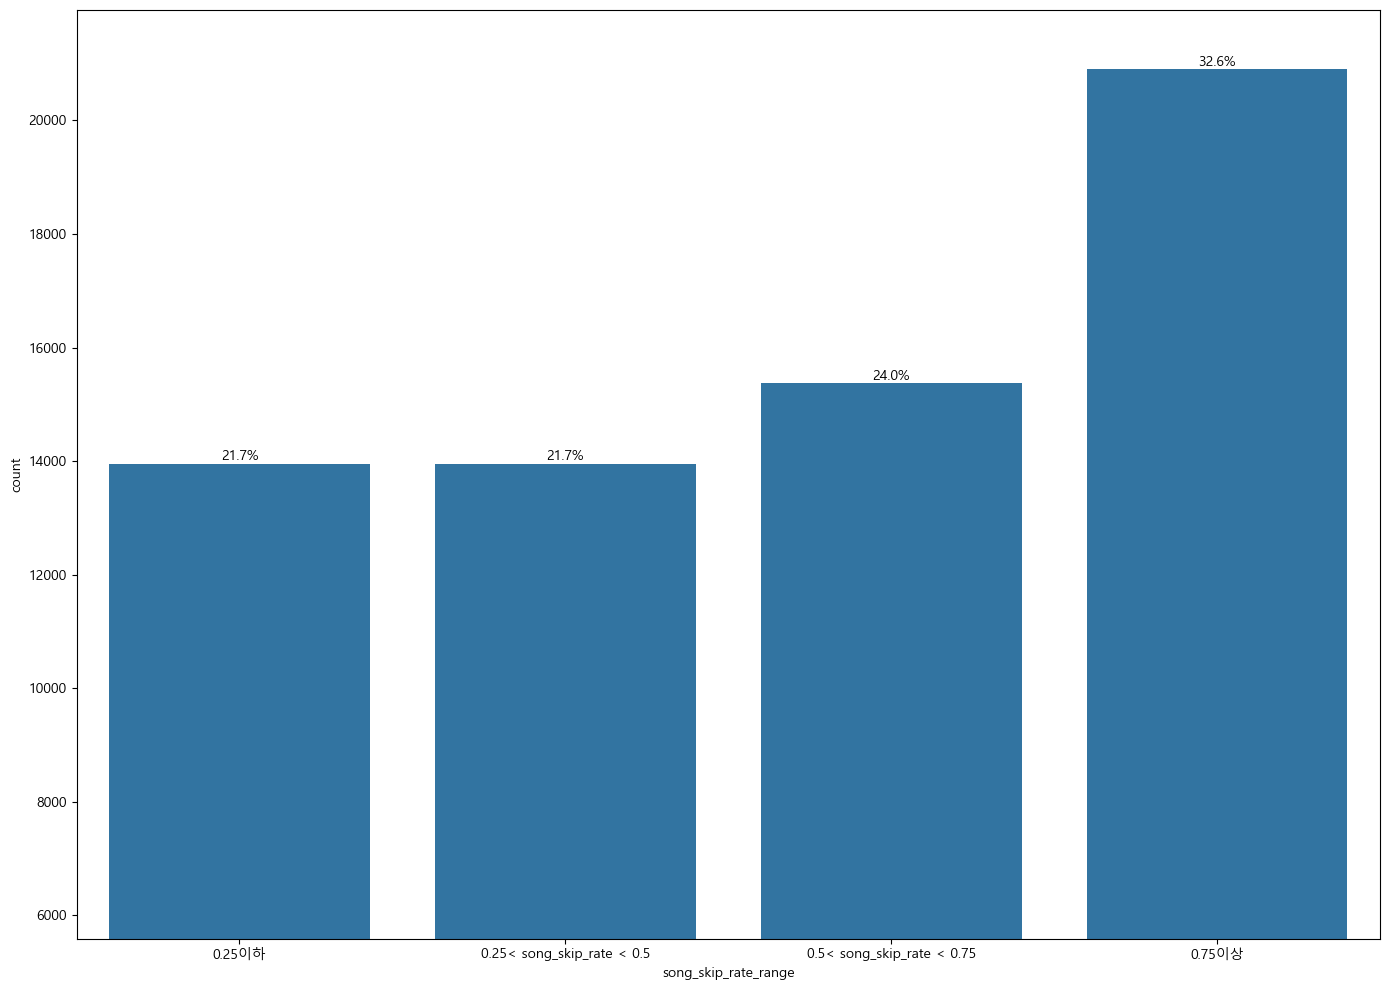

In [15]:
mk_category_column(df,'song_skip_rate',4)
mk_graph(df,'song_skip_rate_range')